In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2
import IPython.display

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


###  Reference code from : 
[Depth Anything Repository](https://github.com/DepthAnything/Depth-Anything-V2/blob/main/metric_depth/depth_to_pointcloud.py)

In [1]:
img_path = "/home/jaykumaran/Office/ml-depth-pro/0F9A9638.JPG"

color_img = cv2.imread(img_path)
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

depth_raw = cv2.imread("/home/jaykumaran/Office/ml-depth-pro/Depth-Input/new/satya_ops/0F9A9638_depth_grayscale.jpg", cv2.IMREAD_UNCHANGED)
depth_raw.shape


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


(2240, 3360)

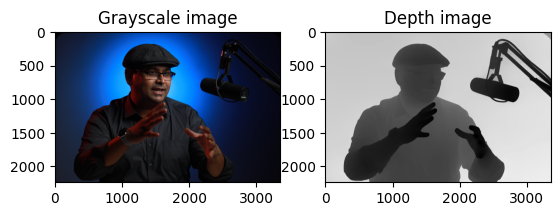

In [2]:
# Plot the images
plt.subplot(1, 2, 1)
plt.title('Grayscale image')
plt.imshow(color_img)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.imshow(depth_raw, cmap = "gray")
plt.show()

In [3]:
height,width, _ = color_img.shape
print("height: ", height)
print("width: ", width)

depth_raw.shape

height:  2240
width:  3360


(2240, 3360)

In [4]:
#Get f_px from image metadata

# from src.depth_pro.utils import load_rgb

# _, _, f_px = load_rgb(img_path)

# focal_length_x  = f_px
# focal_length_y = f_px

# print(f_px)

 
#***************************- --- Otherwise ---- **********************************

focal_length_x  = 140
focal_length_y = 140

x,y = np.meshgrid(np.arange(width), np.arange(height))

x = (x - width /2) / focal_length_x
y = (y - height / 2) / focal_length_y


print(x.shape)


z = np.array(depth_raw)

points = np.stack((np.multiply(x,z), np.multiply(y, z), z), axis = -1).reshape(-1, 3)
colors = np.array(color_img).reshape(-1, 3) / 255.0

(2240, 3360)


In [5]:
points.shape

(7526400, 3)

In [6]:
colors.shape

(7526400, 3)

In [7]:
 # Create the point cloud and save it to the output directory
 
out_dir = "Applications/vis_point_cloud"
os.makedirs(out_dir, exist_ok=True)
 
pcd = o3d.geometry.PointCloud()

pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)

o3d.io.write_point_cloud(f'{os.path.join(out_dir, "satya.ply")}', pcd)

True

In [9]:
# Load in the point cloud created from OpenCV to compared to Open3D
opencv_pcd_path = "Applications/vis_point_cloud/satya.ply"
pcd = o3d.io.read_point_cloud(opencv_pcd_path)

# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

Output video: [Link](https://learnopencv.com/wp-content/uploads/2025/01/point-cloud-projection3d-depth-pto-output-Open3d.mp4)